In [2]:
import importlib
import local_support  

importlib.reload(local_support)


from local_support import *

Training for regression


In [2]:
cloud_dataset = np.load('datasets/train_subset_500k.npz')

In [3]:
X_train_set = cloud_dataset['X_train']
y_train_set = cloud_dataset['y_train']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_train_set, y_train_set, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
train_set = (X_train, y_train)

X_train shape: (400000, 2)
X_test shape: (100000, 2)
y_train shape: (400000,)
y_test shape: (100000,)


In [5]:

best_regressor, best_params  = cross_validate(
    train_data=(X_train_set, y_train_set), 
    model_class=regressors['linear_regression'], 
    param_grid=param_grids_regressor['linear_regression'], 
    metric='neg_mean_squared_error',  # Use the correct scoring for MSE
    num_fold=5
)

Average R²: 0.06918106855129383
Average MSE: 0.17331283241510392
Best R²: 0.08750106898343601


In [6]:
folder_path = 'model_train/regressor'
file_path = os.path.join(folder_path, 'fill_nan_model_ln.pkl')
joblib.dump(best_regressor, file_path)

['model_train/regressor/fill_nan_model_ln.pkl']

###########################################################################

In [3]:
data = np.load('datasets/ndvi_vh_vv_raw_data.npz')
fill_nan_model = joblib.load('model_train/regressor/500points/fill_nan_model_rf.pkl')

In [4]:
vh = data['vh']
vv = data['vv']
ndvi = data['nvdi']


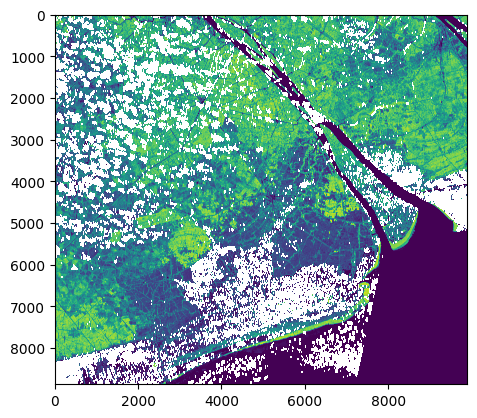

In [5]:
plt.imshow(ndvi[6], vmin=0, vmax=1)

In [5]:
filled_ndvi = np.copy(ndvi)

In [6]:
mask = ~np.isnan(ndvi)

In [7]:
X_pred = np.stack([vh[~mask], vv[~mask]], axis=1)

In [8]:
filled_ndvi[~mask] = fill_nan_model.predict(X_pred)

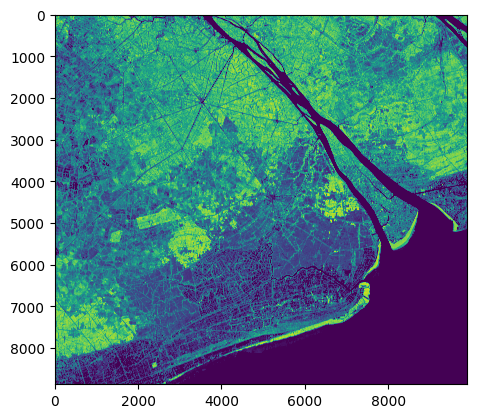

In [11]:
plt.imshow(filled_ndvi[6], vmin=0, vmax=1)


In [10]:
np.savez('rf_filled_cloud.npz', ndvi=filled_ndvi, vv=vv, vh=vh)